In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

In [5]:
covertype_df = pd.read_csv('/users/linggeli/downloads/covtype.csv')

In [9]:
covertype_subset = covertype_df.iloc[0:500000:100, :].values
print(covertype_subset.shape)

(5000, 55)


In [10]:
X = covertype_subset[:, :54]

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)    
pca = PCA(n_components=2)
pca.fit(X)
scores = pca.transform(X)

### k-means clustering is the most widely used unsupervised learning model. It underlies a very crucial idea: latent variable modeling.

http://stanford.edu/~cpiech/cs221/handouts/kmeans.html

In [30]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [27]:
print(kmeans.labels_)

[3 3 3 ... 1 1 1]


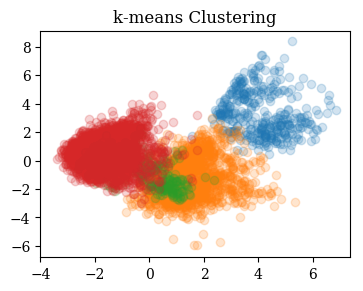

In [29]:
fig = plt.figure(figsize=(4, 3), dpi=100)
for i in range(4):
    plt.scatter(scores[kmeans.labels_ == i, 0], 
                scores[kmeans.labels_ == i, 1], alpha=0.2)
plt.title('k-means Clustering')
plt.show()

### The most important issue in k-means is choosing k. There are several ways but they are all ad-hoc. Also, interpreting the clusters is highly subjective.

https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

### Unsupervised learning is much more than k-means both in terms of complexity and applications.

https://distill.pub/2016/misread-tsne/

https://deepmind.com/blog/unsupervised-learning/